In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from feature_engine.datetime import *
import datetime

In [103]:
def getData(stockName,period='90d',interval='1h'):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [128]:
df=getData('XU030.IS').reset_index()

[*********************100%***********************]  1 of 1 completed


In [129]:
df['pct']=df['Close'].pct_change()
df['label']=np.where(df['pct']>0,1,0)
#df.Datetime = df.Datetime + pd.Timedelta(minutes=15)

In [130]:
df.Datetime

0     2023-02-16 09:30:00+03:00
1     2023-02-16 10:30:00+03:00
2     2023-02-16 11:30:00+03:00
3     2023-02-16 12:30:00+03:00
4     2023-02-16 13:30:00+03:00
                 ...           
773   2023-06-26 13:30:00+03:00
774   2023-06-26 14:30:00+03:00
775   2023-06-26 15:30:00+03:00
776   2023-06-26 16:30:00+03:00
777   2023-06-26 17:30:00+03:00
Name: Datetime, Length: 778, dtype: datetime64[ns, Europe/Istanbul]

In [133]:
dt_fe=["day_of_week","hour","minute"]
dtf=DatetimeFeatures(features_to_extract=dt_fe)
df=dtf.fit_transform(df)

In [134]:
df

,Open,High,Low,Close,Adj Close,Volume,pct,label,Datetime_day_of_week,Datetime_hour,Datetime_minute
0,5481.779785,5926.279785,5481.779785,5857.689941,5857.689941,0,NaN,0,3,9,30
1,5855.830078,5861.470215,5572.040039,5627.819824,5627.819824,0,-0.039242,0,3,10,30
2,5627.229980,5693.299805,5542.830078,5619.890137,5619.890137,0,-0.001409,0,3,11,30
3,5619.680176,5633.299805,5513.479980,5617.040039,5617.040039,0,-0.000507,0,3,12,30
4,5615.509766,5644.740234,5580.709961,5620.209961,5620.209961,0,0.000564,1,3,13,30
...,...,...,...,...,...,...,...,...,...,...,...
773,6380.319824,6396.500000,6376.120117,6383.890137,6383.890137,0,0.000556,1,0,13,30
774,6384.029785,6396.770020,6371.330078,6382.899902,6382.899902,0,-0.000155,0,0,14,30
775,6382.490234,6412.430176,6376.299805,6397.470215,6397.470215,0,0.002283,1,0,15,30
776,6397.259766,6424.790039,6386.140137,6414.669922,6414.669922,0,0.002689,1,0,16,30


<Axes: xlabel='Datetime_day_of_week'>

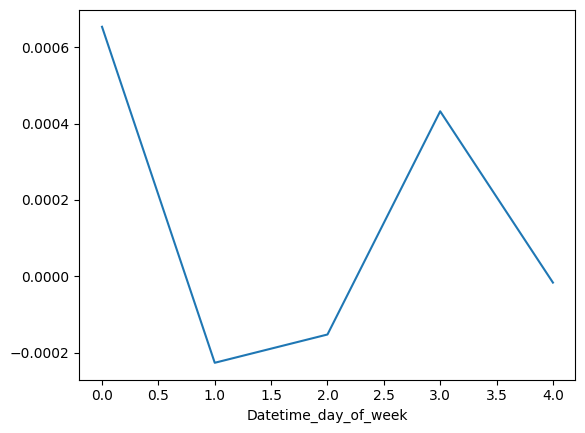

In [119]:
df.groupby('Datetime_day_of_week')['pct'].mean().plot()

<Axes: xlabel='Datetime_hour'>

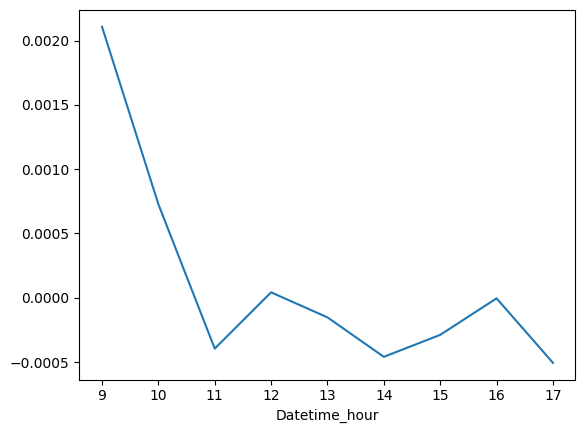

In [120]:
df.groupby('Datetime_hour')['pct'].mean().plot()

<Axes: xlabel='Datetime_minute'>

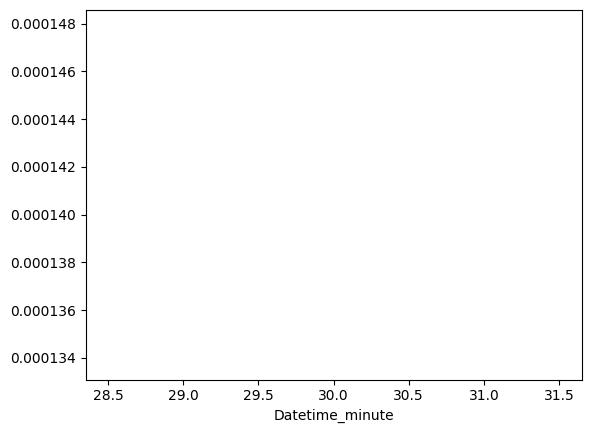

In [121]:
df.groupby('Datetime_minute')['pct'].mean().plot()

<Axes: xlabel='Datetime_minute'>

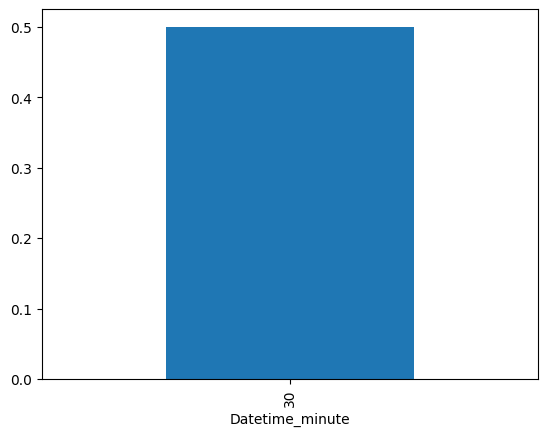

In [122]:
df.groupby('Datetime_minute')['label'].mean().plot(kind='bar')

<Axes: xlabel='label', ylabel='count'>

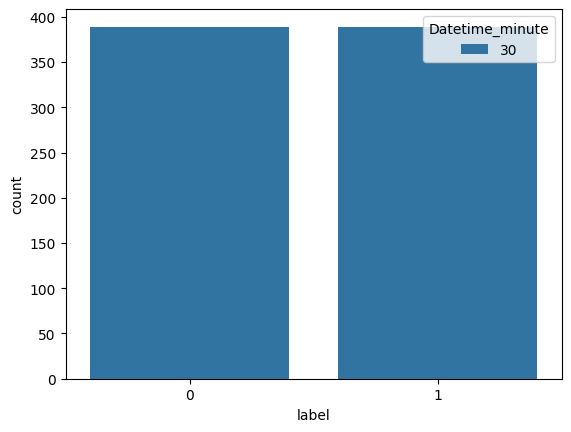

In [123]:
import seaborn as sns
sns.countplot(data=df,x='label',hue='Datetime_minute')

<Axes: xlabel='Datetime_minute', ylabel='count'>

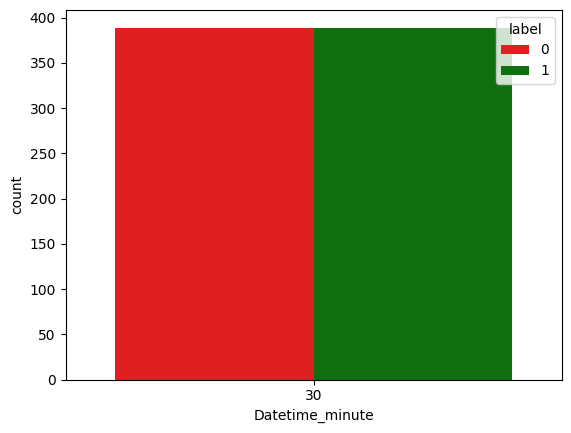

In [124]:
sns.countplot(data=df,x='Datetime_minute',hue='label',palette={0: 'red', 1: 'green'})

<Axes: xlabel='Datetime_hour', ylabel='count'>

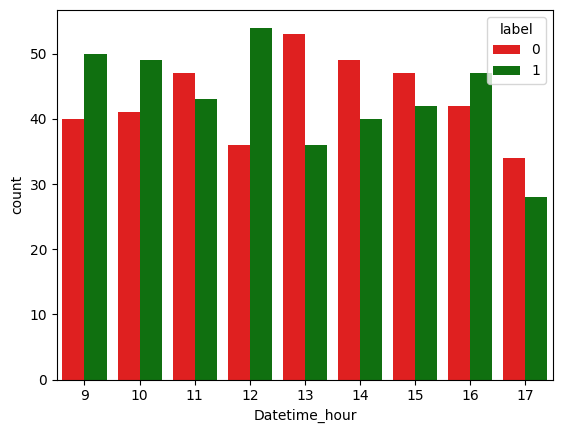

In [126]:
sns.countplot(data=df,x='Datetime_hour',hue='label',palette={0: 'red', 1: 'green'})

<Axes: xlabel='Datetime_day_of_week', ylabel='count'>

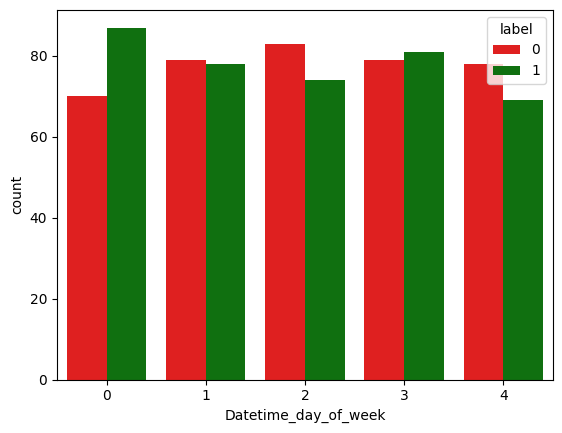

In [135]:
sns.countplot(data=df,x='Datetime_day_of_week',hue='label',palette={0: 'red', 1: 'green'})